In [1]:
from main import ChessDataset
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
xfiles = !ls data/output/chess_iou_2*.csv
len(xfiles)

40

In [3]:
yfiles = !ls data/output/chess_iou_strat_single_vs_more*
len(yfiles)

40

In [11]:
# Which images have the worst metrics on average across the 40 experiments?

X = []
for i, file in enumerate(xfiles):
    df = pd.read_csv(file, index_col=0).squeeze("columns").sort_index()
    df.name = f"exp_{i}"
    X.append(df)
    
# Which images have the worst metrics on average across the 40 experiments?

Y = []
for i, file in enumerate(yfiles):
    df = pd.read_csv(file, index_col=0).squeeze("columns").sort_index()
    df.name = f"exp_{i}"
    Y.append(df)

In [12]:
dfx = pd.concat(X, axis=1)
dfy = pd.concat(Y, axis=1)

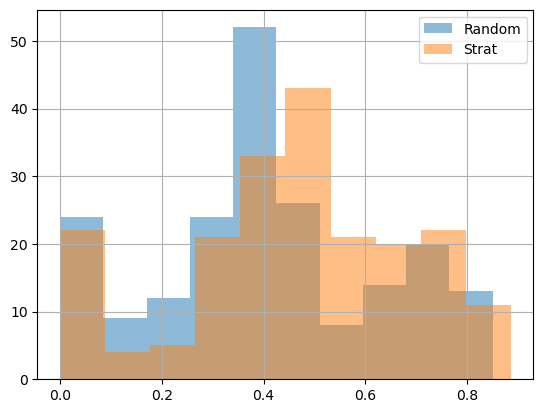

In [14]:
ax = dfx.mean(axis=1).hist(alpha=0.5, label='Random')
dfy.mean(axis=1).hist(ax=ax, alpha=0.5, label='Strat')
plt.legend()

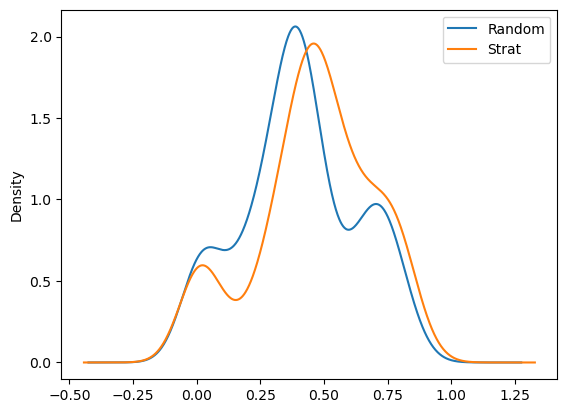

In [16]:
ax = dfx.mean(axis=1).plot(kind='kde', label='Random')
dfy.mean(axis=1).plot(ax=ax, kind='kde', label='Strat')
plt.legend()

In [17]:
X = []
for i, file in enumerate(xfiles):
    df = pd.read_csv(file, index_col=0).squeeze("columns").sort_index()
    X.append(df.mean())
    
# Which images have the worst metrics on average across the 40 experiments?

Y = []
for i, file in enumerate(yfiles):
    df = pd.read_csv(file, index_col=0).squeeze("columns").sort_index()
    Y.append(df.mean())

In [21]:
from scipy.stats import ttest_ind

In [22]:
X, Y = map(pd.Series, (X, Y))

In [24]:
X.mean(), X.var()

(0.40141200478043926, 0.007994394878637383)

In [25]:
Y.mean(), Y.var()

(0.4623225477099654, 0.006600558067481354)

In [26]:
ttest_ind(X, Y, equal_var=False, alternative='less')

Ttest_indResult(statistic=-3.1887547364831064, pvalue=0.001031957578491574)

In [ ]:
# Worst of the best?

In [27]:
Y = []
for i, file in enumerate(yfiles):
    df = pd.read_csv(file, index_col=0).squeeze("columns").sort_index()
    df.name = f"exp_{i}"
    Y.append(df)

df = pd.concat(Y, axis=1)

In [31]:
df.isna().sum(axis=1).sort_values()

137    15
39     16
45     17
81     17
195    18
       ..
72     31
194    31
61     31
36     32
23     32
Length: 202, dtype: int64

In [29]:
df.loc[df.mean(axis=1) == 0].index

Int64Index([0, 15, 41, 75, 77, 187, 10, 47, 178, 78, 74, 121, 160, 113, 97,
            36],
           dtype='int64')

In [30]:
pd.Series([1, 1, np.nan]).mean()

1.0

In [32]:
# Full deck

In [33]:
from main import ChessDataset

In [34]:
ds = ChessDataset('data/train/')
full = []
for _, ann in ds:
    if ann['boxes'].shape[0] == 32:
        full.append(ann['id'].item())

In [35]:
len(full)

19

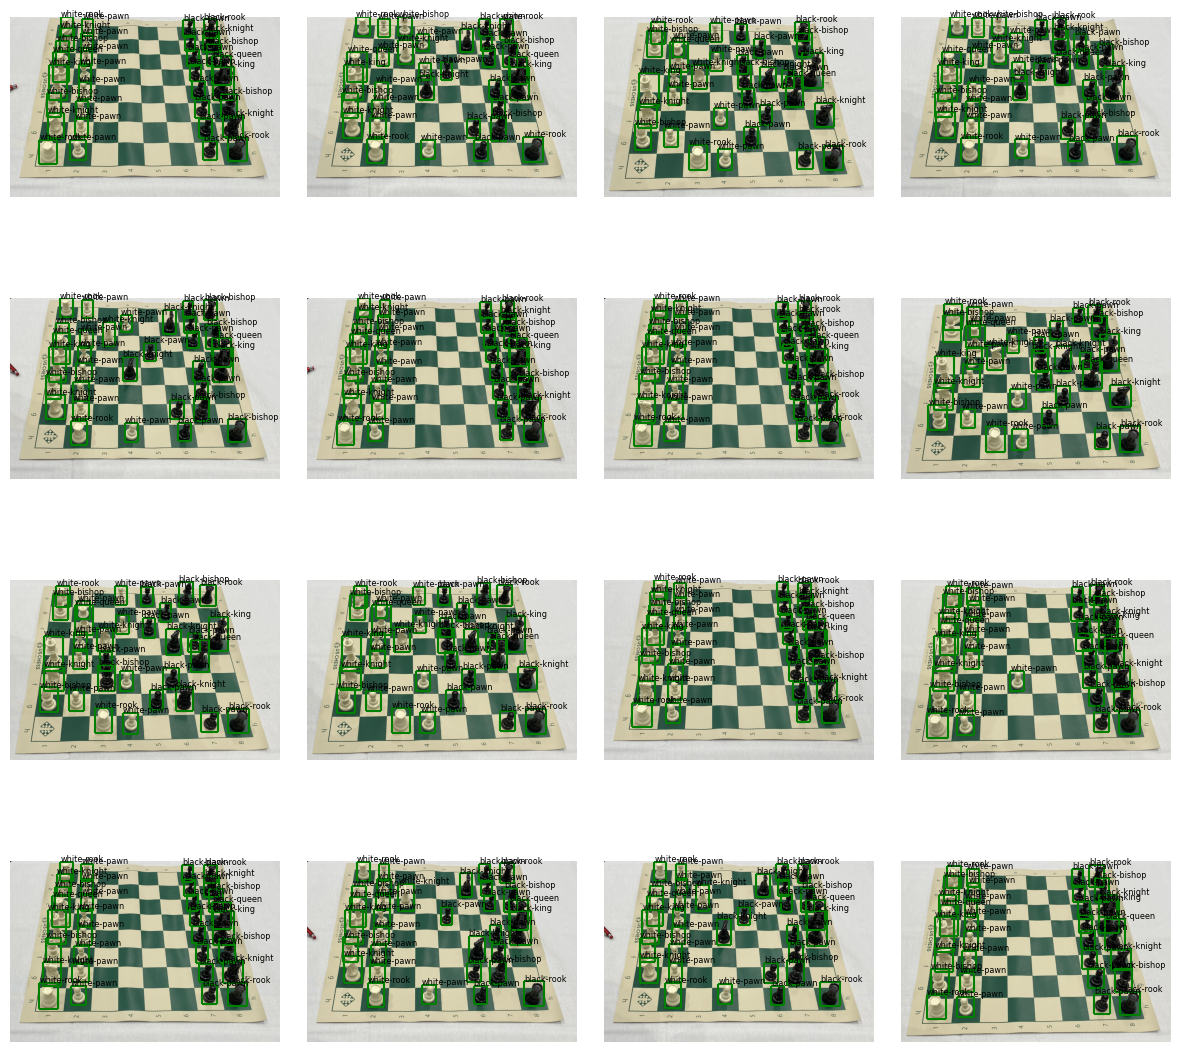

In [39]:
ds.plot_sample(4, 4, idx=full[:16], figsize=(12, 12))